In [1]:
import numpy as np
import os 
from takarada_funkcije import *
import matplotlib.pyplot as plt

parameters1 = {'n_pass' : 1e-3,
'epsilon_threshold' : 1e-4,
'N_epsilon' : 5,
'maxiter' : 50,
'eps_last' : 1e-4,
'dmu' : 0.1,
'mix2' : 0.001,
'mix3' : 1.5,
'faktor1' : 0.1,
'max_trials' : 5,
'eps0' : 0.03,
}

parameters2 = {'n_pass' : 1e-3,
'epsilon_threshold' : 1e-4,
'N_epsilon' : 5,
'maxiter' : 20,
'eps_last' : 1e-4,
'dmu' : 0.1,
'mix2' : 0.001,
'mix3' : 1.5,
'faktor1' : 0.1,
'max_trials' : 5,
'eps0' : 0.03,
}

Nk = 200

In [243]:
# example (c)
a = 1.
b = 0.#5
t = 0.
t_ = 0.
t12 = 1.5
epsilon = 0.1
Vb = 0.5
Vc = 0.5#.
delta = 0.1
phys_parameters = {'b': b,
                   't': t,
                    't_': t_,
                    't12': t12,
                    'epsilon': epsilon,
                    'Vb': Vb,
                    'Vc': Vc}

phys_parameters = [b, t, t_, t12, epsilon, Vb, Vc, delta]

scale = 1.02
beta0 = 110
betas = [100 - 5*i for i in range(20)]
Ts = 1/np.array(betas)
ends = [int(np.emath.logn(scale, beta0/beta)) for beta in betas]

Gamma = 0.01
eps = 1e-9
Nomega = 150

mu0 = 0.
include_hartree = True
mu0 = find_GS_mu(Nk, mu0, phys_parameters, parameters1, parameters2, include_hartree, beta0=100, beta1=90)
m = model(Nk, mu0, phys_parameters, parameters1, parameters2, include_hartree)
m.GS()

found mu in the Ground state


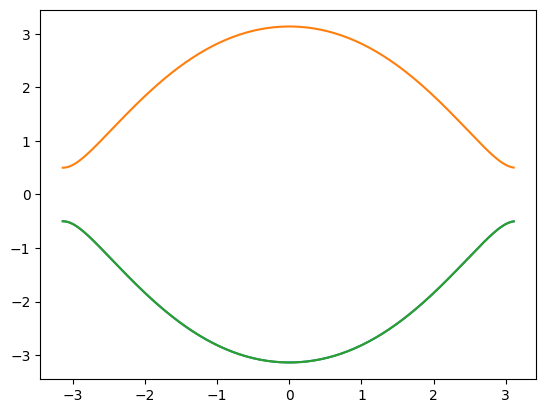

In [244]:
plt.plot(m.K, m.energije[0] - m.mu)
plt.plot(m.K, m.energije[1] - m.mu)
plt.plot(m.K, -(m.energije[1] - m.mu))

In [276]:
T = 1
K1s, K1bs = np.zeros((10,5)), np.zeros((10,5))

for i in range(10):
    for j in range(5):
        b = i*0.1
        delta=t12 - t12/5*j
        phys_parameters = [b, t, t_, t12, epsilon, Vb, Vc,  delta]

        tok = j_tok(m.K, phys_parameters, m.mu)
        Gamma =  0.05
        omegas = np.linspace(-5,5,121)
        phi = phi_Kubo(m.K, m.vecs, m.energije, tok, m.mu, omegas, Gamma)
        phiQ = phi_Q(m.K, m.rho, phys_parameters, m.vecs, m.energije, tok, m.mu, omegas, Gamma)

        #plt.plot(omegas, phi.real * omegas, color=colorFader('red', 'blue', i/4), ls='dashed')
    # plt.plot(omegas,  phiQ[0].real  + phiQ[1].real  + phiQ[2].real + phiQ[3].real, color=colorFader('red', 'blue', i/4))
       # plt.plot(omegas, phi.real * omegas +  phiQ[0].real  + phiQ[1].real  + phiQ[2].real + phiQ[3].real, color=colorFader('red', 'blue', i/50))

        K1 = np.sum(phi.real * omegas * (-fd_1(omegas, T)))
        K1b = K1 + np.sum((phiQ[0].real  + phiQ[1].real  + phiQ[2].real + phiQ[3].real) * (-fd_1(omegas, T)))
        print(K1, K1b)
        K1s[i,j], K1bs[i,j] = K1, K1b
        #plt.text(0,0.1+0.2*i, b, color=colorFader('red', 'blue', i/50))

    #plt.ylim(-1,1)
    #plt.xlim(-1,1)

0.0 0.0
9.019731585744394e-17 0.07567651669731494
5.065059957071581e-16 0.31135167974168165
7.354479634519016e-16 0.7070254891330995
2.0260239828286326e-15 1.2626979448715703
3.7386669443794104e-18 0.004482273708930693
1.3638657171914767e-16 0.069486776490439
4.397086995539982e-16 0.27554400017762726
3.046815627756345e-16 0.622653944770495
2.1737959743780785e-15 1.1108166102690449
1.4954667777517642e-17 0.007968486593654575
1.1689320031649852e-16 0.059540976864634616
3.4767559198461327e-16 0.22678310430365206
8.767625860930646e-16 0.509694868910707
7.708730915326732e-16 0.9082762706857987
3.372931518080927e-17 0.010458638654171643
1.600867918113394e-16 0.04583911781990198
6.189847845573674e-16 0.16506899211975626
8.973788651034218e-16 0.36814826155373404
2.1193698723522534e-15 0.6550769261218364
5.981867111007057e-17 0.011952729890481895
1.9310890065564034e-16 0.02838119935624107
8.858748871302876e-16 0.0904016636259398
1.6432867987162974e-15 0.19801412269957744
1.5008383033612263e-15 

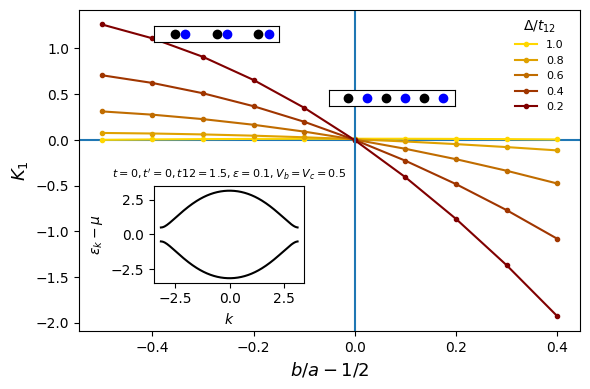

In [359]:
fig, ax = plt.subplots(figsize=(6,4))
for i in range(5):
    plt.plot(np.arange(10)*0.1 - 0.5, K1bs[:,i], '.-', color=colorFader('gold', 'maroon', i/4), label=np.round((t12 - t12/5*i)/t12, 3))
plt.axhline(0, zorder=-100)


plt.xlabel(r'$b/a - 1/2$', fontsize=13)
plt.axvline(0)
plt.ylabel(r'$K_1$', fontsize=13)

ins = ax.inset_axes([0.15,0.15,0.3,0.3])
ins.plot(m.K, m.energije[0] - m.mu, color='black')
ins.plot(m.K, m.energije[1] - m.mu, color='black')
ins.set_xlabel(r'$k$'), ins.set_ylabel(r'$\varepsilon_k - \mu$')
ins.set_title(r"$t=0, t'=0, t12 = 1.5, \varepsilon=0.1, V_b=V_c = 0.5$", fontsize=8)

ins2 = ax.inset_axes([0.5,0.7,0.25,0.05])
ins2.scatter([0, 1, 2], [0, 0, 0], color='black')
ins2.scatter([0.5, 1.5, 2.5], [0, 0, 0], color='blue')
ins2.set_xlim(-0.5,2.8)
ins2.set_xticks([]), ins2.set_yticks([])

ins2 = ax.inset_axes([0.15,0.9,0.25,0.05])
ins2.scatter([0, 1, 2], [0, 0, 0], color='black')
ins2.scatter([0.25, 1.25, 2.25], [0, 0, 0], color='blue')
ins2.set_xlim(-0.5,2.5)
ins2.set_xticks([]), ins2.set_yticks([])

plt.legend(bbox_to_anchor=(0.85,0.65), fontsize=8, frameon=False).set_title(r'$\Delta/t_{12}$')

plt.tight_layout()

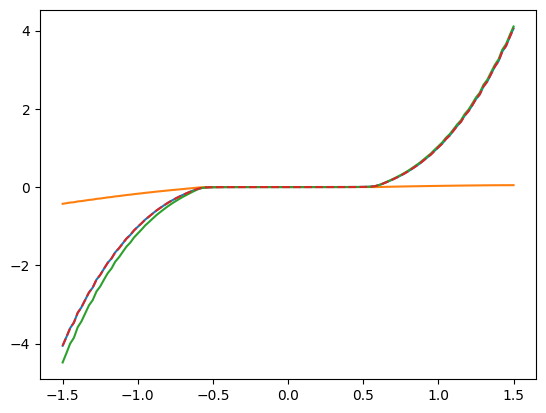

In [169]:
plt.plot(omegas, phi.real * omegas)
#plt.plot(omegas, phiQ[0].real)
plt.plot(omegas, phiQ[0].real + phiQ[1].real  + phiQ[2].real + phiQ[3].real)

plt.plot(omegas, phi.real * omegas + phiQ[0].real + phiQ[1].real  + phiQ[2].real + phiQ[3].real)

plt.plot(omegas, -(phi.real * omegas)[::-1], ls='dashed')


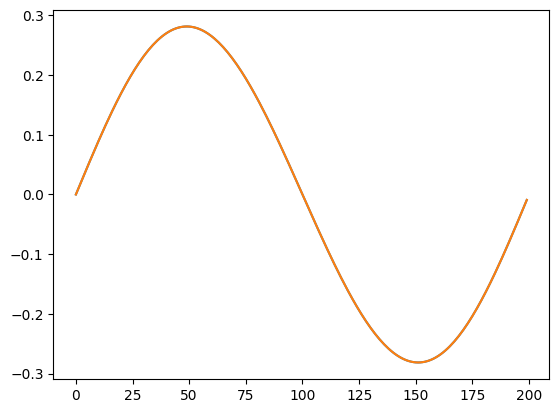

In [312]:
phys_parameters = [0.7, t, t_, 1, epsilon, 10, Vc,  0.]


mat1 = mf_matrix1(m.K, m.rho, phys_parameters, m.mu)
mat2 = mf_matrix2(m.K, m.rho, phys_parameters, m.mu)
mat3 = mf_matrix3(m.K, m.rho, phys_parameters, m.mu)
mat4 = mf_matrix4(m.K, m.rho, phys_parameters, m.mu)

plt.plot(mat3[0,0].real)
plt.plot(mat4[0,0].real)


False

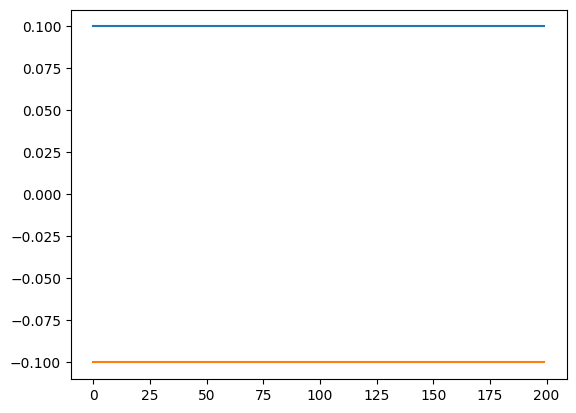

In [54]:
plt.plot(mat1[0,1].imag)
plt.plot(mat1[1,0].imag)
np.allclose(mat1,0)

In [24]:
b = 0.2
alpha = 0.2
t12 = 0.2
phys_parameters = [b, t, t_, t12, epsilon, Vb, Vc, alpha]
mat1 = mf_matrix1(m.K, m.rho, phys_parameters, m.mu)
np.allclose(mat2, 0)

True

[0.08169110485975618, 0.0626218563891581]

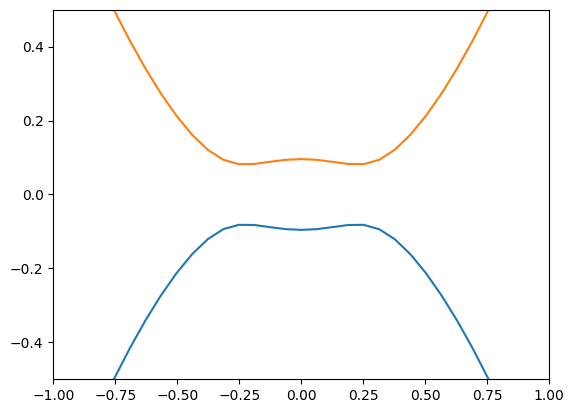

In [ ]:
plt.plot(m.K, m.energije[0] - m.mu)
plt.plot(m.K, m.energije[1] - m.mu)


plt.ylim(-0.5,0.5)
plt.xlim(-1,1)

np.min(m.energije[1]) - np.max(m.energije[0])
m.phi